<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
#We added this code so that it does not display errors as a red box

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

## Load and Prepare Data

In [4]:
df = pd.read_csv("train.csv")
#Load date with pandas

## EDA

In [5]:
df.head()
#Seeing the first 5 data is to have an idea about the data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.shape

(10886, 12)

In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
df.info()
#Get information about columns and the data type of each column and the number of available data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<AxesSubplot:>

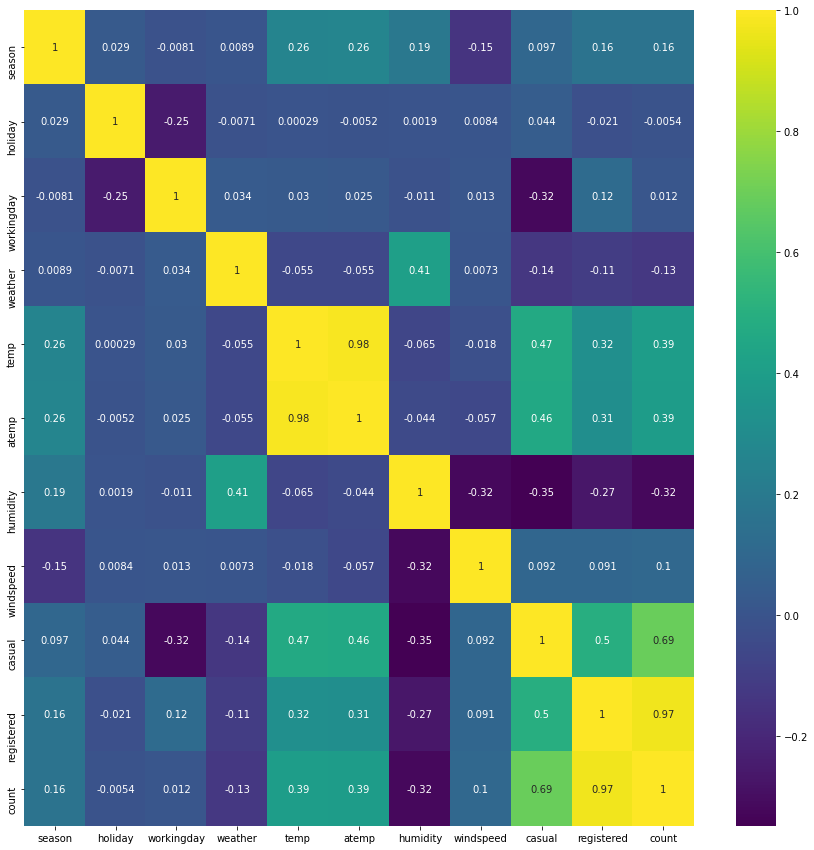

In [10]:
corr = df.corr()
plt.figure(figsize=(15,15)) 
sns.heatmap(corr, cmap='viridis', annot=True)
#After trying different cmaps, I think the best cmap is "viridis"

## Data Preprocessing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


##### We see that we have no null data in the dataframe

In [12]:
def count_values(m):
    x = 0
    for i in df[m].value_counts():
        x += 1
    print(x)

In [13]:
print("the value_counts of all colums: ")
for i in df.columns:
    print(i,end=" ")
    count_values(i)

the value_counts of all colums: 
datetime 10886
season 4
holiday 2
workingday 2
weather 4
temp 49
atemp 60
humidity 89
windspeed 28
casual 309
registered 731
count 822


## Strorytelling - Visualization

In [14]:
sns.set_theme(style="dark")

#### we can use this themes
white, dark, whitegrid, darkgrid, ticks

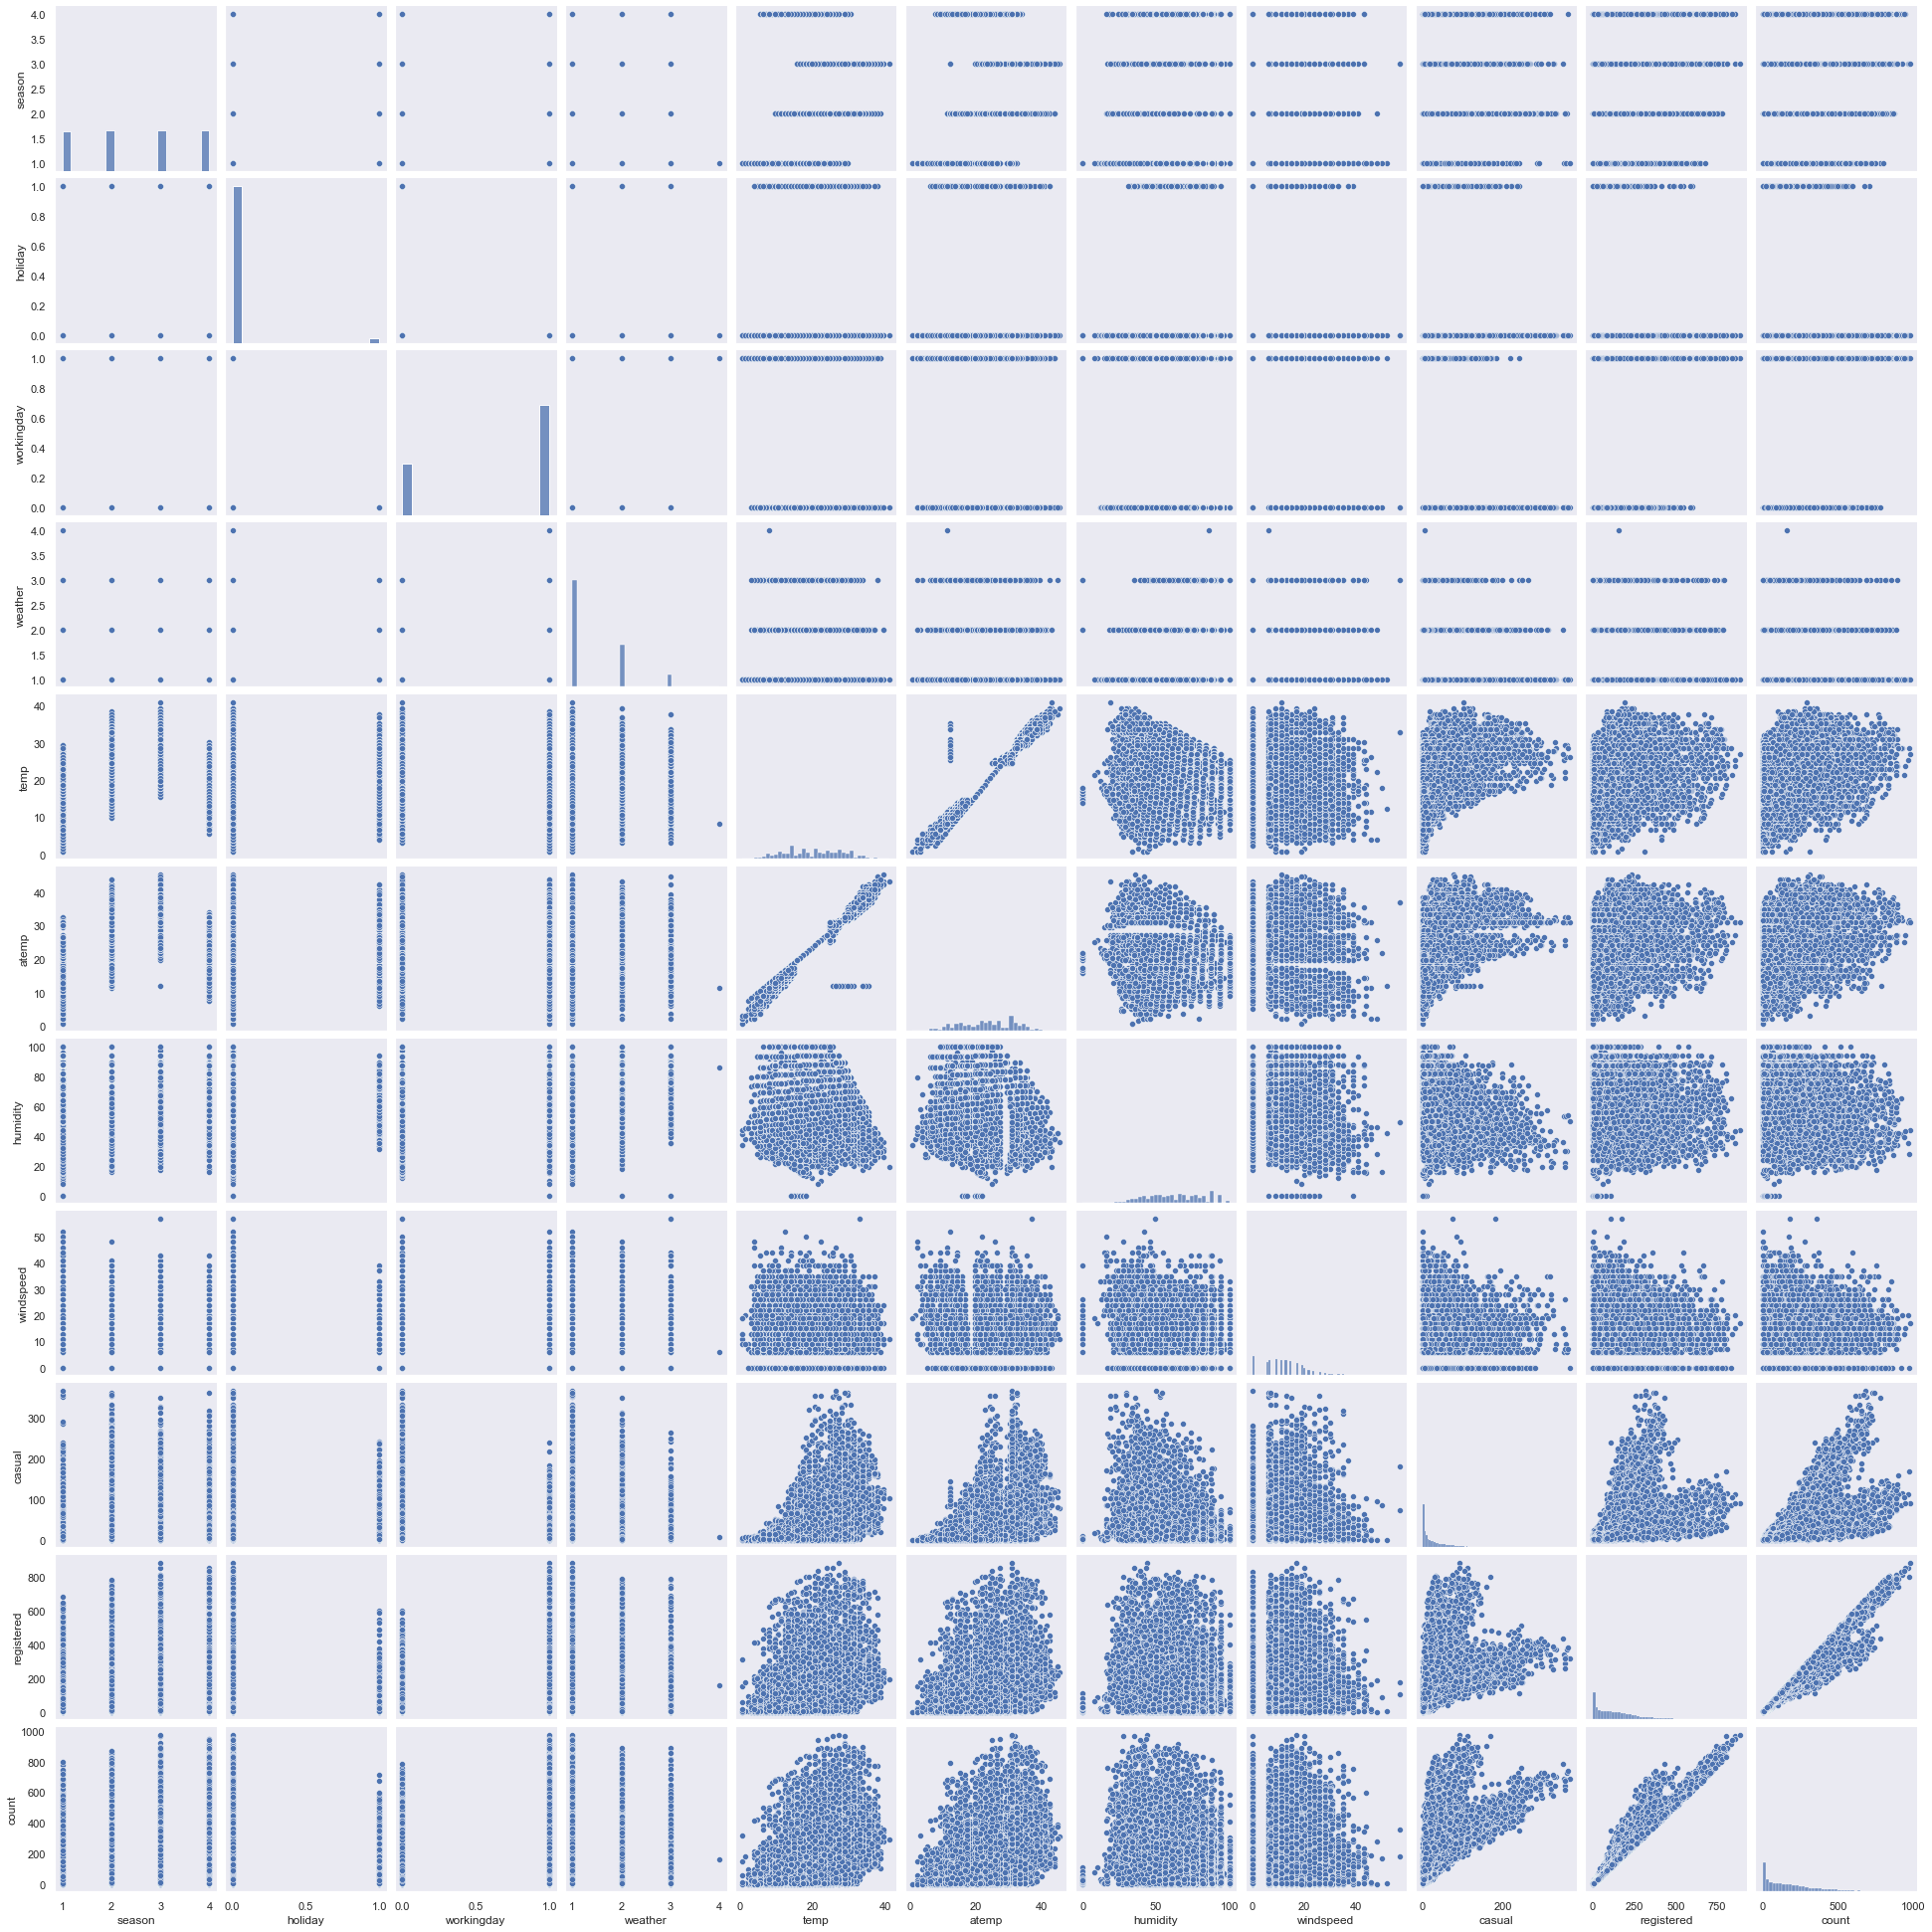

In [15]:
sns.pairplot(df)

This chart does not give us the correct information at all
Because the number of features is large

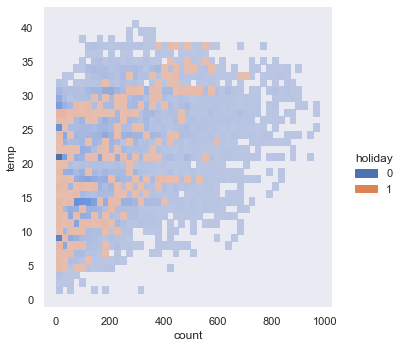

In [16]:
sns.displot(df, x="count", y="temp",hue="holiday", kind="hist")

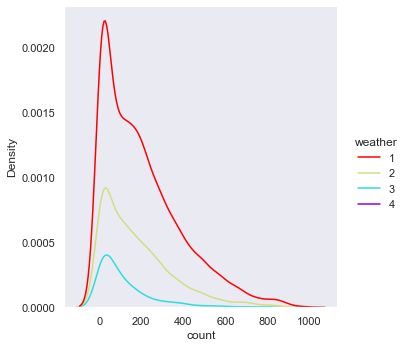

In [17]:
sns.displot(df, x="count", kind="kde", hue="weather", palette="rainbow_r")

### we can use this paletts:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r

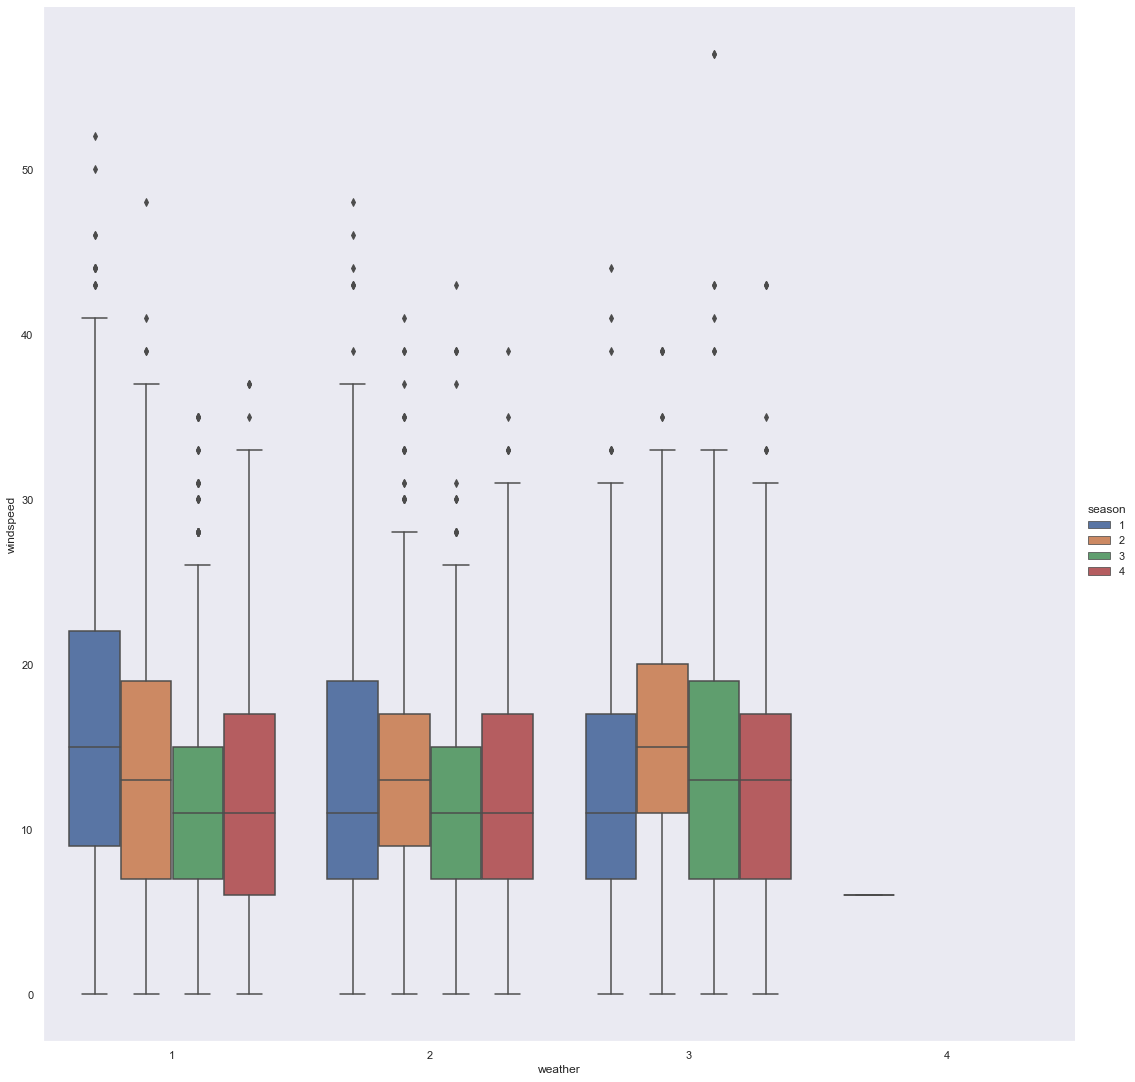

In [18]:
sns.catplot(x="weather", y="windspeed", hue="season", kind="box", data=df, height=15)

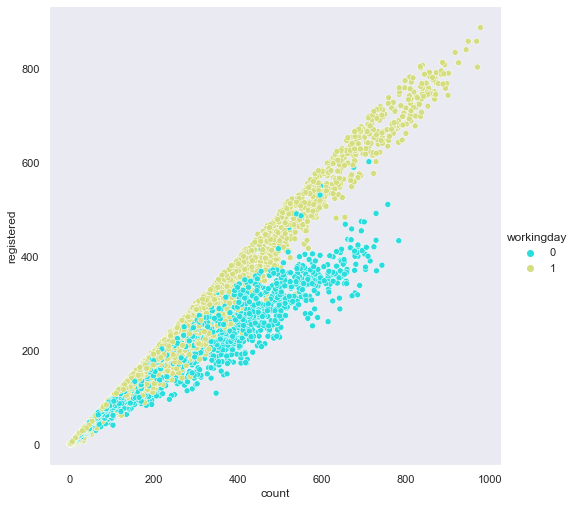

In [19]:
sns.relplot(x="count", y="registered", hue="workingday", data=df,height=7,palette="rainbow",kind="scatter")

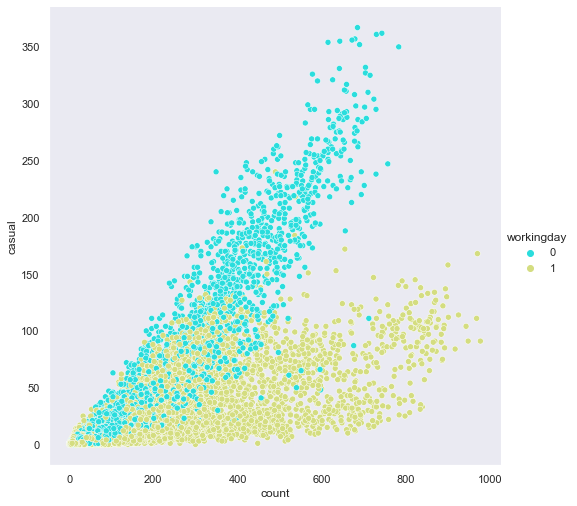

In [20]:
sns.relplot(x="count", y="casual", hue="workingday", data=df,height=7,palette="rainbow",kind="scatter")

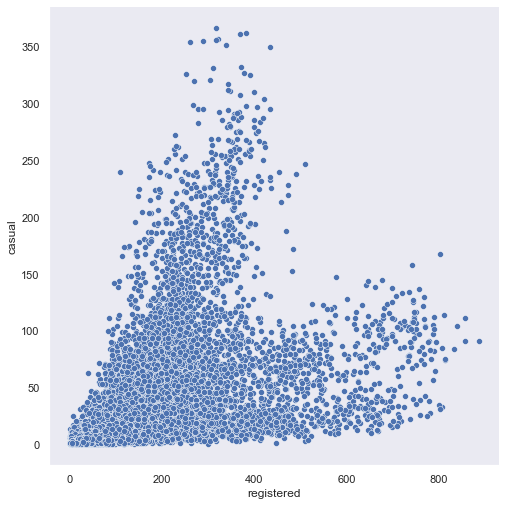

In [21]:
sns.relplot(x="registered", y="casual", data=df,height=7,palette="rainbow",kind="scatter")

<AxesSubplot:xlabel='count', ylabel='casual'>

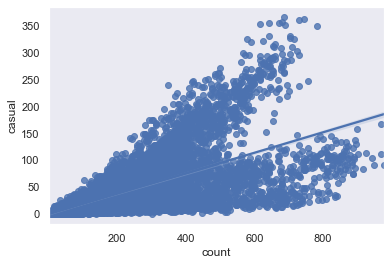

In [22]:
sns.regplot(x="count", y="casual", data=df)

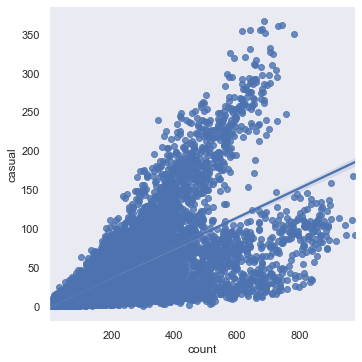

In [23]:
sns.lmplot(x="count", y="casual", data=df)

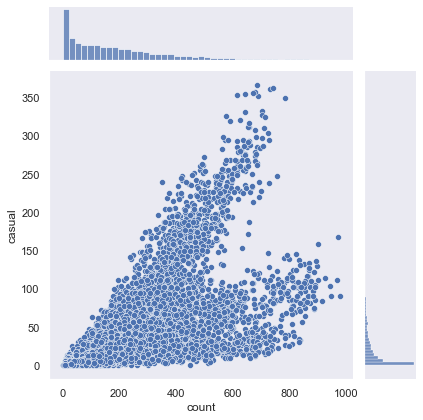

In [24]:
sns.jointplot(x="count", y="casual", data=df)

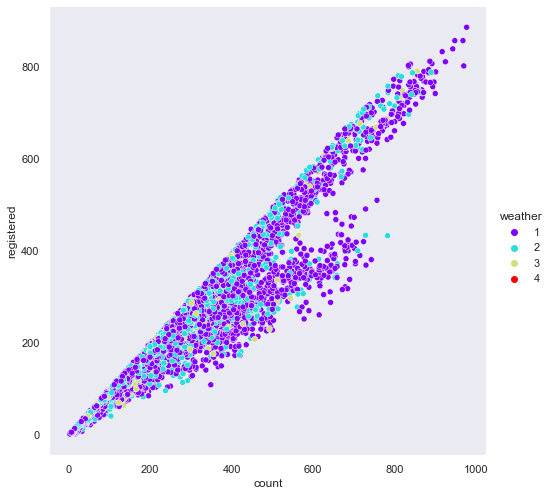

In [25]:
sns.pairplot(df, x_vars="count", y_vars="registered", hue="weather", palette="rainbow", height=7)

<AxesSubplot:>

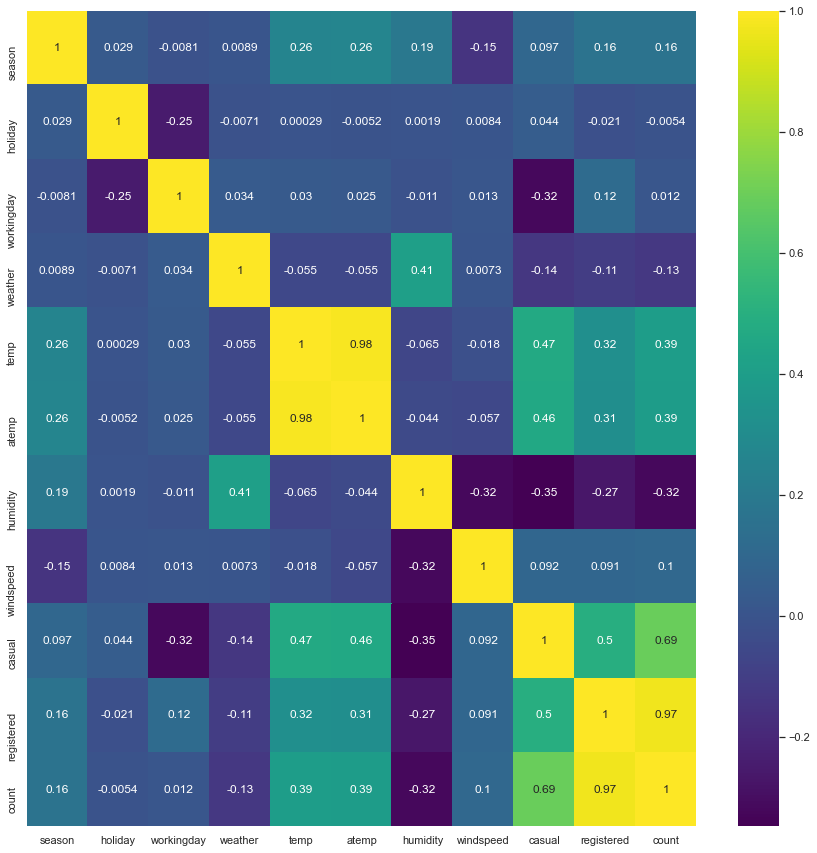

In [26]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='viridis', annot=True)

# Train your model (Regression)

## **_Train Model without casual and registered_**

### Multiple Linear Regression

In [27]:
#Separate labels from data
X = df[["season","holiday","workingday","weather",
        "temp","atemp","humidity","windspeed"]]
Y = df["count"]

In [28]:
#Split data for testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 23)

In [29]:
multiple_lr = LinearRegression()

multiple_lr.fit(X_train, Y_train)

LinearRegression()

##### predict with train data

In [30]:
multiple_lr_predict_X_train = multiple_lr.predict(X_train)

In [31]:
#Model Evaluation
print('R^2:',metrics.r2_score(Y_train, multiple_lr_predict_X_train))
print('MAE:',metrics.mean_absolute_error(Y_train, multiple_lr_predict_X_train))
print('MSE:',metrics.mean_squared_error(Y_train, multiple_lr_predict_X_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, multiple_lr_predict_X_train)))

R^2: 0.2611470907770952
MAE: 116.21083640849082
MSE: 24066.9571035671
RMSE: 155.13528645529715


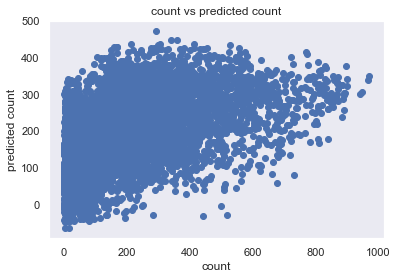

In [32]:
# Visualizing the differences between actual count and predicted values
plt.scatter(Y_train, multiple_lr_predict_X_train)
plt.xlabel("count")
plt.ylabel("predicted count")
plt.title("count vs predicted count")
plt.show()

##### predict with test data

In [33]:
multiple_lr_predict_X_test = multiple_lr.predict(X_test)

In [34]:
#Model Evaluation
print('R^2:',metrics.r2_score(Y_test, multiple_lr_predict_X_test))
print('MAE:',metrics.mean_absolute_error(Y_test, multiple_lr_predict_X_test))
print('MSE:',metrics.mean_squared_error(Y_test, multiple_lr_predict_X_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, multiple_lr_predict_X_test)))

R^2: 0.2593331503184799
MAE: 116.94883769649456
MSE: 24710.769006154966
RMSE: 157.19659349411796


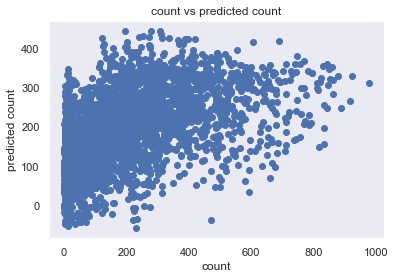

In [35]:
# Visualizing the differences between actual count and predicted values
plt.scatter(Y_test, multiple_lr_predict_X_test)
plt.xlabel("count")
plt.ylabel("predicted count")
plt.title("count vs predicted count")
plt.show()

### Polynomial Regression 

In [36]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
quadratic = LinearRegression()
quadratic.fit(X_train_quadratic, Y_train)
y_train_predicted2 = quadratic.predict(X_train_quadratic)
y_test_predicted2 = quadratic.predict(poly_features.fit_transform(X_test))

In [37]:
print(metrics.r2_score(Y_train, y_train_predicted2))
print(metrics.r2_score(Y_test, y_test_predicted2))

0.31051758776385263
0.30157559130414435


In [38]:
poly_features2 = PolynomialFeatures(degree=3)
X_train_cubic = poly_features2.fit_transform(X_train)
cubic = LinearRegression()
cubic.fit(X_train_cubic, Y_train)
y_train_predicted3 = cubic.predict(X_train_cubic)
y_test_predicted3 = cubic.predict(poly_features2.fit_transform(X_test))

In [39]:
print(metrics.r2_score(Y_train, y_train_predicted3))
print(metrics.r2_score(Y_test, y_test_predicted3))

0.3421785384641971
0.3187492118560601


## **_Train Model with casual and registered_**

### Multiple Linear Regression

In [40]:
#Separate labels from data
X2 = df.drop(["count","datetime"], axis = 1)
Y2 = df["count"]

In [41]:
#Split data for testing and training
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,Y2, test_size = 0.3, random_state = 23)

In [42]:
multiple_lr2 = LinearRegression()

multiple_lr2.fit(X_train2, Y_train2)

LinearRegression()

##### predict with train data

In [43]:
multiple_lr_predict_X_train2 = multiple_lr2.predict(X_train2)

In [44]:
#Model Evaluation
print('R^2:',metrics.r2_score(Y_train2, multiple_lr_predict_X_train2))
print('MAE:',metrics.mean_absolute_error(Y_train2, multiple_lr_predict_X_train2))
print('MSE:',metrics.mean_squared_error(Y_train2, multiple_lr_predict_X_train2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train2, multiple_lr_predict_X_train2)))

R^2: 1.0
MAE: 1.1238373020179661e-12
MSE: 2.2444973868392497e-24
RMSE: 1.498164672804445e-12


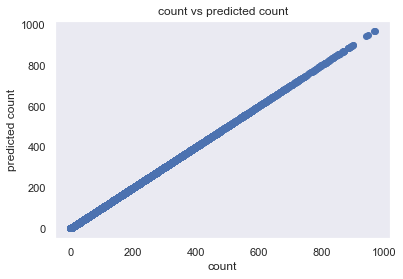

In [45]:
# Visualizing the differences between actual count and predicted values
plt.scatter(Y_train2, multiple_lr_predict_X_train2)
plt.xlabel("count")
plt.ylabel("predicted count")
plt.title("count vs predicted count")
plt.show()

##### predict with test data

In [46]:
multiple_lr_predict_X_test2 = multiple_lr2.predict(X_test2)

In [47]:
#Model Evaluation
print('R^2:',metrics.r2_score(Y_test2, multiple_lr_predict_X_test2))
print('MAE:',metrics.mean_absolute_error(Y_test2, multiple_lr_predict_X_test2))
print('MSE:',metrics.mean_squared_error(Y_test2, multiple_lr_predict_X_test2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test2, multiple_lr_predict_X_test2)))

R^2: 1.0
MAE: 1.1542215438166448e-12
MSE: 2.3213154186262607e-24
RMSE: 1.5235863673012635e-12


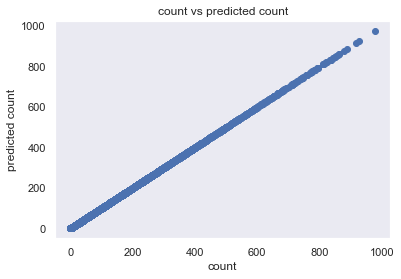

In [48]:
# Visualizing the differences between actual count and predicted values
plt.scatter(Y_test2, multiple_lr_predict_X_test2)
plt.xlabel("count")
plt.ylabel("predicted count")
plt.title("count vs predicted count")
plt.show()

### Polynomial Regression 

In [49]:
poly_features3 = PolynomialFeatures(degree=2)
X_train_quadratic2 = poly_features3.fit_transform(X_train2)
quadratic2 = LinearRegression()
quadratic2.fit(X_train_quadratic2, Y_train2)
y_train2_predicted2 = quadratic2.predict(X_train_quadratic2)
y_test2_predicted2 = quadratic2.predict(poly_features3.fit_transform(X_test2))

In [50]:
print(metrics.r2_score(Y_train2, y_train2_predicted2))
print(metrics.r2_score(Y_test2, y_test2_predicted2))

1.0
1.0


In [51]:
poly_features4 = PolynomialFeatures(degree=3)
X_train_cubic2 = poly_features4.fit_transform(X_train2)
cubic2 = LinearRegression()
cubic2.fit(X_train_cubic2, Y_train2)
y_train2_predicted3 = cubic2.predict(X_train_cubic2)
y_test2_predicted3 = cubic2.predict(poly_features4.fit_transform(X_test2))

In [52]:
print(metrics.r2_score(Y_train2, y_train2_predicted3))
print(metrics.r2_score(Y_test2, y_test2_predicted3))

1.0
1.0


<h6><pre>Our model with casual and registered features always predicts the right answer
Because sum these two features
So we should not use casual and registered</pre></h6>

### Logistic Regression

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [54]:
Y_pred_train = logreg.predict(X_train)

In [55]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(Y_train, Y_pred_train)))

The accuracy of Logistic Regression is:  0.02178477690288714


In [56]:
Y_pred_test = logreg.predict(X_test)

In [57]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(Y_test, Y_pred_test)))

The accuracy of Logistic Regression is:  0.018677281077770974


In [58]:
confusion_matrix = pd.crosstab( Y_pred_test,Y_test, rownames=['Predicted'], colnames=['Actual'])

In [59]:
confusion_matrix

Actual,1,2,3,4,5,6,7,8,9,10,...,849,852,858,862,863,877,888,917,925,977
Predicted,,,,,,,,,,,,,,,,,,,,,
1,6,7,3,1,5,3,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,1,2,1,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9,7,8,9,10,4,4,1,3,0,...,0,0,0,0,0,0,0,0,0,0
4,12,13,13,11,14,13,9,7,6,13,...,0,0,0,0,0,0,0,0,0,0
5,3,9,8,12,17,17,8,5,7,13,...,0,0,0,0,1,0,0,0,0,0
6,0,1,2,4,10,12,3,4,2,4,...,0,0,0,0,0,0,0,1,0,0
7,1,1,0,0,1,1,0,1,2,4,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           1       0.04      0.18      0.06        33
           2       0.02      0.09      0.04        43
           3       0.03      0.22      0.05        36
           4       0.02      0.28      0.04        39
           5       0.02      0.28      0.04        60
           6       0.03      0.23      0.05        53
           7       0.00      0.00      0.00        28
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        35
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00        25
          13       0.00      0.00      0.00        26
          14       0.00      0.00      0.00        23
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00        28
          17       0.00      0.00      0.00        20
          18       0.00    

## We see that we get the best prediction with Grade 3 Polynomial Regression

## Test Result

In [61]:
df_test = pd.read_csv("test.csv")

In [62]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [63]:
df_sample = pd.read_csv("sampleSubmission.csv")

In [64]:
df_sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [65]:
print(df_test.index)
print(df_sample.index)

RangeIndex(start=0, stop=6493, step=1)
RangeIndex(start=0, stop=6493, step=1)


In [66]:
for i in range(0,6493,1):
    if df_test["datetime"][i] == df_sample["datetime"][i]:
        data = df_test.drop(["datetime"], axis=1)
        data_is_ready = poly_features2.fit_transform(data)
        
        df_sample["count"]= cubic.predict(data_is_ready)

In [67]:
df_sample.head()

,datetime,count
0,2011-01-20 00:00:00,91.895856
1,2011-01-20 01:00:00,92.389833
2,2011-01-20 02:00:00,92.389833
3,2011-01-20 03:00:00,90.923587
4,2011-01-20 04:00:00,90.923587


In [68]:
df_sample.describe()

,count
count,6493.000000
mean,183.824251
std,109.469509
min,-198.547785
25%,98.073371
50%,165.810232
75%,262.344480
max,570.106395


In [69]:
df_sample.to_csv("final_sampleSubmission.csv", index=False)

## Send us the Result (Maktabkhoone)